### <font face="Computer Modern" size = 6 > Algorithmie et utilisation de Python en analyse de données

<b><font face="Verdana" size = 5 color = "green" >Mouhamadou GAYE</font><br/>
<b><font face="Verdana" size = 4 color = "red" >MSDS SIGMA CLERMONT</font>

# <i> <font face="Computer Modern" size = 6 >Descente de gradient


### <i><font face="Computer Modern" size = 5 > 1.  la fonction coût </font>

<i><font face="Computer Modern Sans" size = 4>Le but de la regression linéaire est de trouver un modele qui prédit au mieux nos données. Ce modele est basé sur une fonction h(x) dont l'expression est la suivante pour la régression linéaire univariée : $ h(x) = \theta_0 + \theta_1 \times X $   
Pour obtenir le meilleur modele possible, nous devons trouver la fonction hypothese qui fait le moins d'erreur possible sur les données en entrée en choisissant les meilleurs parametres du modele. Et pour ce faire, nous definirons la fonction cout dont l'expression est la suivante:<br/> $$ J(\theta_0,\theta_1) = \frac{1}{2m}\sum_{i=1}^{m}(h(x_i) - y_i)^2$$<br/>
<font face="Computer Modern Sans" size = 4>Cette fonction symbolise l'erreur entre les prédictions de notre modele et la valeurs réelles des "labels", ainsi trouver le meilleur modele revient a minimiser cette fonction cout et de tirer les deux parametres de notre fonction hypothese et le tour est joué.</font></i>

### <i><font face="Computer Modern" size = 5 >2. Mise a jour des parametres du modele.</font>


$ 1- Initialisation\space\space des\space\space parametres\space\space(\theta_0, \theta_1)$ <br/>
$ 2- Itérer\space\space jusqu'à\space\space convergence:$
$$ \theta_j = \theta_j - \alpha\frac{\partial}{\partial \theta_j}J(\theta_0,\theta_1)\space\space pour\space tout\space j.$$
$avec\space \alpha \space étant\space le\space pas.$</font></i>

### <i><font face="Computer Modern" size = 5 >3. Regularisation.</font>

<i><font face="Computer Modern Sans" size = 4>Nous avons ci dessus la fonction de coup de la regularisation ElasticNet
    Nous avons opte de faire une generalisation du descente de gradients ainsi en fonction des parametres: $$\lambda ,\alpha $$
 Ainsi on observer les cas suivant :
   - Si les 2 parametres sont nulle on obtient la descent de gradient classique
   - Si le parametre lambda est non nulle et que le parametre alpha est nulle,la fonction cout depuis alors celle de la regularisation Ridge
   - Si le parametre lambda est non nulle est que le parametre alpha est egal a 1 on est dans le cas de la regularisation Lasso
   - Et enfin restant concerne la regularisation ElasticNet qui est un compromis en Ridge et Lasso</font></i>

$$ J(\theta) = \frac{1}{2m}\sum_{i=1}^{m}(h(x_i) - y_i)^2 + \lambda\sum_{j=1}^{n}\left [ \frac{1}{2}(1 - \alpha)\theta_j^2 +\alpha|\theta_j|\right]
 $$<br/>

<i><font face="Computer Modern Sans" size = 4>Dans le cadre de ce travail, nous avons implemente la descente gradient sous ces 4 formes ci-dessus dans un module avec quelques fonctionnalite. Dans les lignes qui suivent nous traiterons des donnees avec ce module</font></i>

In [1]:
from gradient_descent import gradient_descent
import matplotlib.pyplot as plt
import numpy as np

### <i><font face="Computer Modern" size = 5 > 1.  Descente de gradient Simple </font>


<i><font face="Computer Modern Sans" size = 4>Nous allons dans un premier temps tester nos donnes sur des donnees d'entrainement univariees pour faciliter la visualisation du resultat</font></i>

In [2]:
classic = gradient_descent.GradientDescent(learning_rate = 0.01)

In [28]:
import numpy as np 
import pandas as pd
np.random.seed(42)
X = 3 * np.random.rand(100, 1) - 2
Y = 2*X + 7 + np.random.randn(100, 1)

### <i><font face="Computer Modern" size = 3 > subdiviser nos donnnes en training_set and test_set grace a notre module </font>


In [29]:
X_train, y_train, X_test, y_test = classic.train_test_split(X,Y,ratio=0.3,random_seed=44)

### <i><font face="Computer Modern" size = 3 > Generation de donnes univariees </font>

Text(0, 0.5, 'Labels')

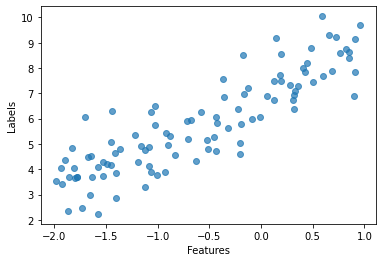

In [30]:
plt.figure()
plt.scatter(X,Y,alpha = 0.7)
plt.xlabel('Features')
plt.ylabel('Labels')

### <i><font face="Computer Modern" size = 3 > Entrainement du modele </font>

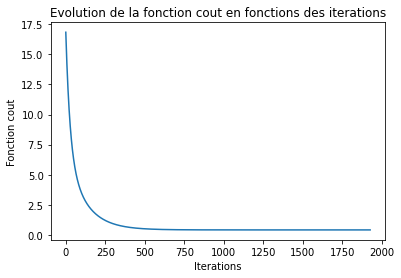

In [31]:
classic.fit(X_train, y_train)

### <i><font face="Computer Modern" size = 3 > Parametres du modele apres entrainement </font>

In [32]:
classic.parameters_

array([[1.81333038],
       [6.8793849 ]])

In [33]:
coeff_dir , ord_org = classic.parameters_[0][0],  classic.parameters_[1][0]

Text(0, 0.5, 'Labels')

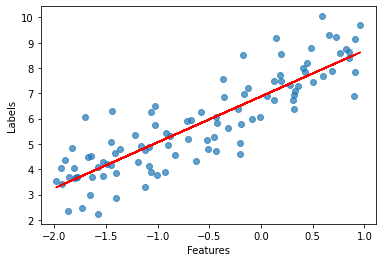

In [34]:
plt.figure()
plt.scatter(X,Y,alpha = 0.7)
plt.plot(X,X*coeff_dir+ord_org, color = 'red')
plt.xlabel('Features')
plt.ylabel('Labels')

### <i><font face="Computer Modern" size = 4 > Scoring </font>

In [35]:
y_pred = classic.predict(X_test)

### <i><font face="Computer Modern" size = 3 > RMSE </font>

In [36]:
classic.rmse(y_pred, y_test)

0.6284869221550045

### <i><font face="Computer Modern" size = 4 > Coefficient de determination </font>

In [37]:
classic.r2_score(y_pred, y_test)

0.7605463992578114

### <i><font face="Computer Modern" size = 4 > MAE </font>

In [38]:
classic.mae(y_pred, y_test)

0.3357069330962164

### <i><font face="Computer Modern" size = 5 > 2.  Regularization Ridge </font>


In [39]:
ridge = gradient_descent.GradientDescent(regularize = 'ridge', learning_rate = 0.01)

Le meilleur parametre de penalite lambda :  0.41000000000000003


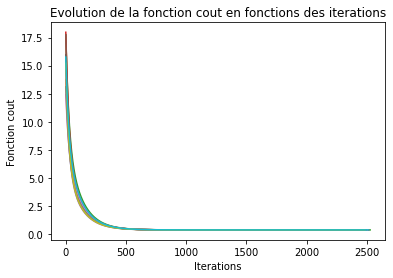

In [40]:
ridge.tunning(X_train,y_train,scoring="mae") 

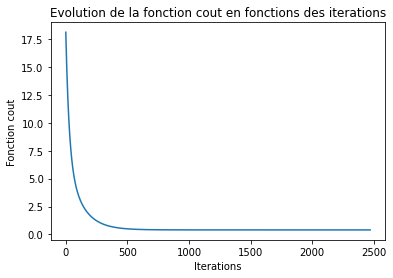

In [41]:
ridge.fit(X_train, y_train, lambd = 0.41)

Text(0, 0.5, 'Labels')

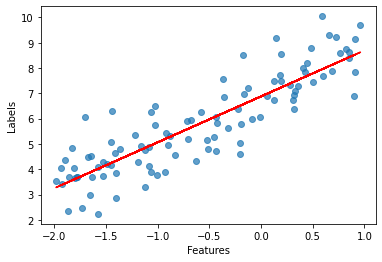

In [42]:
ridge.parameters_
coeff_dir , ord_org = ridge.parameters_[0][0],  ridge.parameters_[1][0]
plt.figure()
plt.scatter(X,Y,alpha = 0.7)
plt.plot(X,X*coeff_dir+ord_org, color = 'red')
plt.xlabel('Features')
plt.ylabel('Labels')

### <i><font face="Computer Modern" size = 4 > Scoring </font>

In [43]:
y_pred = ridge.predict(X_test)

In [44]:
ridge.r2_score(y_pred, y_test)

0.7605971130423201

### <i><font face="Computer Modern" size = 5 > 3.  Lasso </font>


In [45]:
lasso = gradient_descent.GradientDescent(regularize = 'lasso', learning_rate = 0.01, normalize = True)

Le meilleur parametre de penalite lambda :  0.21000000000000002


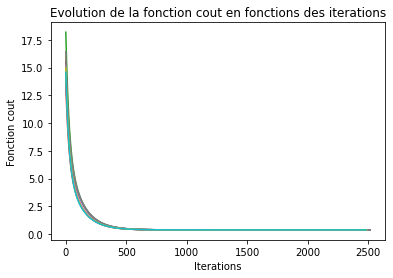

In [46]:
ridge.tunning(X_train,y_train,scoring="rmse") 

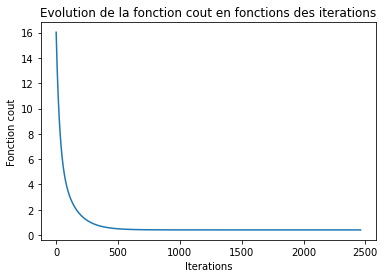

In [48]:
ridge.fit(X_train, y_train, lambd = 0.21)

In [58]:
y_pred = ridge.predict(X_test)
ridge.rmse(y_pred, y_test)

0.6284159549548781

### <i><font face="Computer Modern" size = 5 > 4.  ElasticNet </font>


<i><font face="Computer Modern Sans" size = 4>On teste maintenant l'Algorithme sur des donnees multivariees</font></i>

In [72]:
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()
X = diabetes.data
Y = diabetes.target

In [74]:
Y = Y.reshape(-1,1)
Y.shape

(442, 1)

In [71]:
X.shape

(442, 10)

In [76]:
X_train, y_train, X_test, y_test = elastic.train_test_split(X,Y,ratio=0.3,random_seed=44)

In [77]:
elastic = gradient_descent.GradientDescent(regularize = 'elasticNet', learning_rate = 0.01, normalize = True)

Les meilleurs parametres de penalite pour la regularisation sont : lambda =  0.81 , alpha =  0.41000000000000003


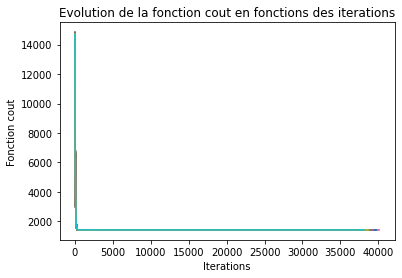

In [78]:
elastic.tunning(X_train,y_train,scoring="rmse") 

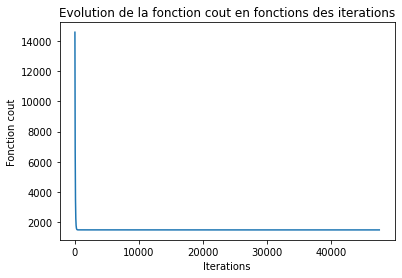

In [80]:
elastic.fit(X_train,y_train,lambd = 0.81, alpha = 0.41) 

In [84]:
y_pred = elastic.predict(X_test)
elastic.rmse(y_pred, y_test)

52.15885907066837